In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Load the data
df = pd.read_csv("audible_books.csv")

In [3]:
# Display dataset info
print("Dataset Overview:")
print(df.head(), "\n")
print(df.info())

Dataset Overview:
                                               title  \
0                                Too Good to Be True   
1                One Arranged Murder (Hindi Edition)   
2                               The Primal Hunter 11   
3       The Quick and Easy Way to Effective Speaking   
4  Ramayana Banaam Mahabharata [Ramayana vs. Maha...   

                          author            release_date              length  
0      Written by: Prajakta Koli  Release Date: 23-03-25   6 hrs and 38 mins  
1      Written by: Chetan Bhagat  Release Date: 07-03-25   5 hrs and 40 mins  
2            Written by: Zogarth  Release Date: 05-03-25  23 hrs and 31 mins  
3      Written by: Dale Carnegie  Release Date: 14-06-18   6 hrs and 39 mins  
4  Written by: Devdutt Pattanaik  Release Date: 26-02-20   6 hrs and 19 mins   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --

In [4]:
# Extract year from 'release_date'
df["release_date"] = df["release_date"].astype(str)  # Ensure it's a string
df[["day", "month", "year"]] = df["release_date"].str.extract(r'(\d{2})-(\d{2})-(\d{2})$', expand=True)
df["release_year"] = "20" + df["year"]  # Convert YY to YYYY format
df["release_year"] = pd.to_numeric(df["release_year"], errors="coerce").fillna(0).astype(int)

In [5]:
# Convert 'length' to total minutes
def convert_length(length):
    if pd.isna(length):  # Handle missing values
        return 0
    match_hr = re.search(r'(\d+)\s*hrs?', length)
    match_min = re.search(r'(\d+)\s*mins?', length)
    hours = int(match_hr.group(1)) if match_hr else 0
    minutes = int(match_min.group(1)) if match_min else 0
    return hours * 60 + minutes

df["length"] = df["length"].str.replace("Length: ", "", regex=False).fillna("")  # Remove prefix & handle NaNs
df["length_mins"] = df["length"].apply(convert_length)

In [6]:
# Top authors by number of books
top_authors = df["author"].value_counts().head(10)
print(top_authors)

author
Written by: Harvard Business Review                  155
Written by: OSHO                                      95
Written by: Devdutt Pattanaik                         86
Written by: Om Swami                                  85
Written by: Dale Carnegie                             79
Written by: J.K. Rowling                              79
Written by: Pierce Brown                              77
Written by: David Baldacci                            77
Written by: Daniel N. Robinson, The Great Courses     76
Written by: Preeti Shenoy                             76
Name: count, dtype: int64


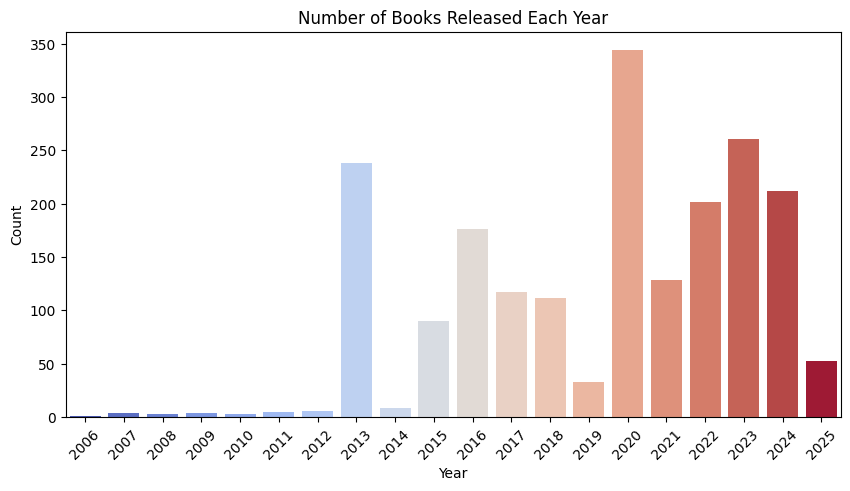

In [7]:
# Release Year Distribution (Bar Chart)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="release_year", hue="release_year", palette="coolwarm", legend=False, order=sorted(df["release_year"].unique()))
plt.xticks(rotation=45)
plt.title("Number of Books Released Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

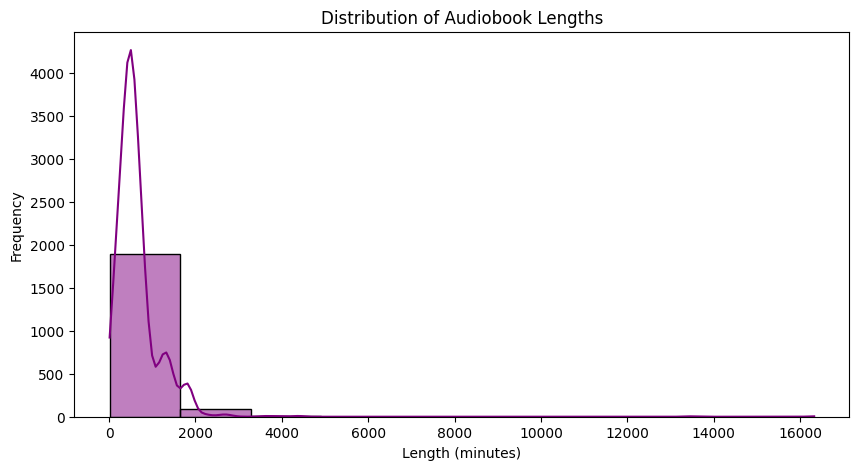

In [8]:
# Audiobook Length Distribution (Histogram)
plt.figure(figsize=(10, 5))
sns.histplot(df["length_mins"], bins=10, kde=True, color="purple")
plt.title("Distribution of Audiobook Lengths")
plt.xlabel("Length (minutes)")
plt.ylabel("Frequency")
plt.show()

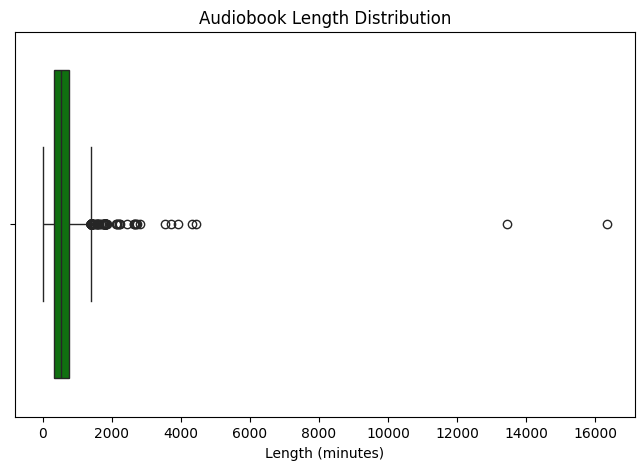

In [9]:
# Boxplot for Audiobook Lengths
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["length_mins"], color="green")
plt.title("Audiobook Length Distribution")
plt.xlabel("Length (minutes)")
plt.show()

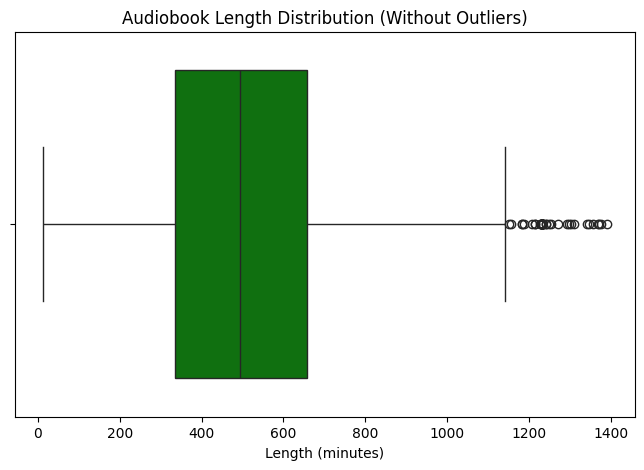

In [10]:
# Compute IQR
Q1 = df["length_mins"].quantile(0.25)
Q3 = df["length_mins"].quantile(0.75)
IQR = Q3 - Q1

# Define acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out extreme outliers
filtered_df = df[(df["length_mins"] >= lower_bound) & (df["length_mins"] <= upper_bound)]

# Boxplot after removing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=filtered_df["length_mins"], color="green")
plt.title("Audiobook Length Distribution (Without Outliers)")
plt.xlabel("Length (minutes)")
plt.show()


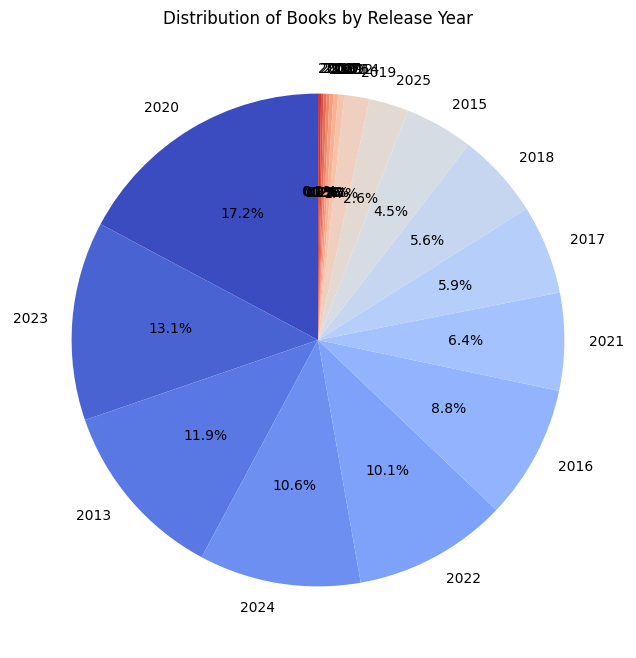

In [11]:
# Pie Chart: Books Released Per Year
plt.figure(figsize=(8, 8))
df["release_year"].value_counts().plot.pie(autopct="%1.1f%%", cmap="coolwarm", startangle=90)
plt.title("Distribution of Books by Release Year")
plt.ylabel("")
plt.show()

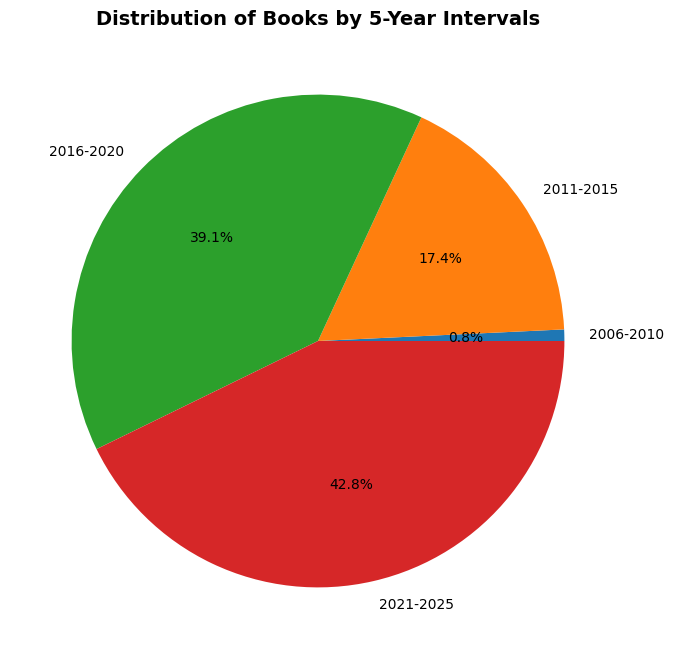

In [12]:
bins = list(range(df["release_year"].min(), df["release_year"].max() + 5, 5))
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

# Create a new column for grouped years
df["year_group"] = pd.cut(df["release_year"], bins=bins, labels=labels, right=False)

# Aggregate counts
year_group_counts = df["year_group"].value_counts().sort_index()

# Pie Chart with 5-Year Groups
plt.figure(figsize=(8, 8))

year_group_counts.plot.pie(autopct="%1.1f%%")

# Title and adjustments
plt.title("Distribution of Books by 5-Year Intervals", fontsize=14, fontweight="bold")
plt.ylabel("")  # Remove default ylabel for clarity
plt.show()

/tmp/ipykernel_34900/2600869324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")


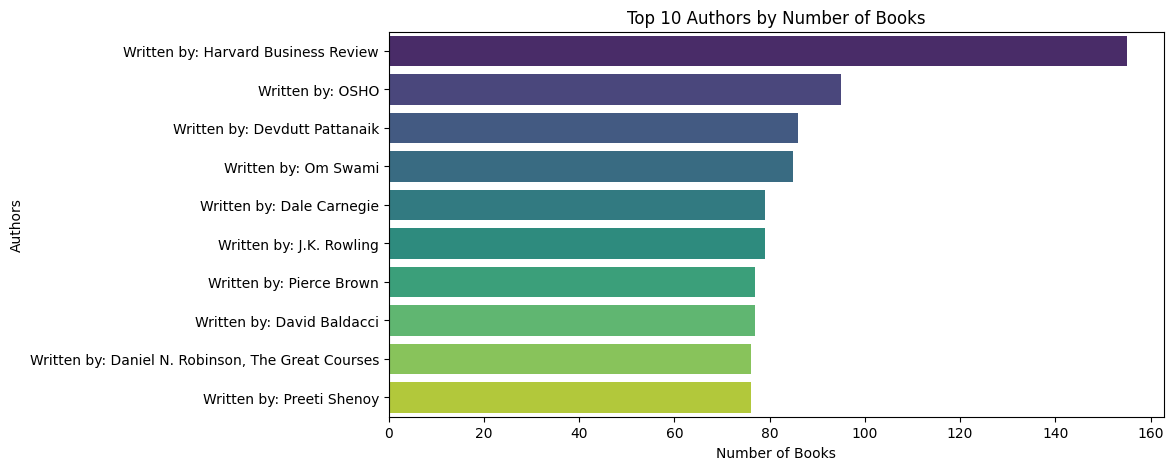

In [13]:
# Top 10 Most Frequent Authors
plt.figure(figsize=(10, 5))
sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")
plt.title("Top 10 Authors by Number of Books")
plt.xlabel("Number of Books")
plt.ylabel("Authors")
plt.show()

In [14]:
# Print Summary Statistics
print("Book Length Statistics:")
print(df["length_mins"].describe())

Book Length Statistics:
count     1999.000000
mean       655.145073
std        646.709070
min         13.000000
25%        335.000000
50%        519.000000
75%        759.000000
max      16329.000000
Name: length_mins, dtype: float64


In [15]:
# Top 5 Longest Books
print("Top 5 Longest Books:")
print(df.nlargest(5, "length_mins")[["title", "author", "length"]])

Top 5 Longest Books:
                                                 title  \
420  The Ultimate Classics Collection – Volume One:...   
470  The British Classics Collection - Volume One: ...   
122                  Dungeon Heroes Omnibus: Books 1-6   
82          Sherlock Holmes: The Definitive Collection   
48   True Crime Case Histories: Massive 15-Book Col...   

                                                author               length  
420  Written by: Arthur Conan Doyle, Fyodor Dostoye...   272 hrs and 9 mins  
470  Written by: George Orwell, Charles Dickens, Th...  224 hrs and 12 mins  
122            Written by: Shane Hammond, Marcus Sloss   73 hrs and 51 mins  
82   Written by: Stephen Fry - introductions, Arthu...   71 hrs and 57 mins  
48                              Written by: Jason Neal   65 hrs and 33 mins  


In [16]:
# 🔹 Save cleaned dataset
df.to_csv("cleaned_books.csv", index=False)

print("Data Cleaning & Analysis Completed!")

Data Cleaning & Analysis Completed!
